In [52]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets, neighbors, linear_model
from sklearn.cross_validation import train_test_split
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import confusion_matrix

import sys
import os.path as osp
import time
sys.path.append(osp.dirname(osp.dirname(osp.abspath('__file__'))))

import acoc
import utils
from utils import data_manager
from config import CLASSIFIER_CONFIG

In [4]:
# import some data to play with
iris = data_manager.load_data_set('iris')
X = iris.data
y = iris.target

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

class_indices = list(set(y))

# SVM

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
clf = SVC(gamma='auto', C=1.0)
prediction = clf.fit(X_train, y_train).predict(X_test)
score = (clf.score(X_test, y_test) * 100)
print(score)
print(prediction)

98.0
[1 1 2 0 0 1 2 2 1 1 2 2 2 0 2 0 0 0 0 2 1 0 2 2 0 1 0 0 2 2 1 2 1 0 1 2 2
 1 2 2 2 1 2 1 1 0 1 2 1 0]


# Linear SVM

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
clf = LinearSVC()
prediction = clf.fit(X_train, y_train).predict(X_test)
score = (clf.score(X_test, y_test) * 100)
print(score)

96.0


# Logistic regression

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
clf = linear_model.LogisticRegression()
prediction = clf.fit(X_train, y_train).predict(X_test)
score = (clf.score(X_test, y_test)*100)
print(score)

96.0


# PolyACO+

In [19]:
CLASSIFIER_CONFIG.max_level = 2
CLASSIFIER_CONFIG.level_convergence_rate = 5

clf = acoc.PolyACO(X.shape[1], class_indices, CLASSIFIER_CONFIG)
clf.train(X_train, y_train)
y_pred = clf.evaluate(X_test)
print("\rClassification score: {}".format(acoc.compute_score(y_pred, y_test)))

Classification score: 37.333333333333336


Normalized confusion matrix
[[ 1.    0.    0.  ]
 [ 0.    0.94  0.06]
 [ 0.    0.    1.  ]]


<IPython.core.display.Javascript object>


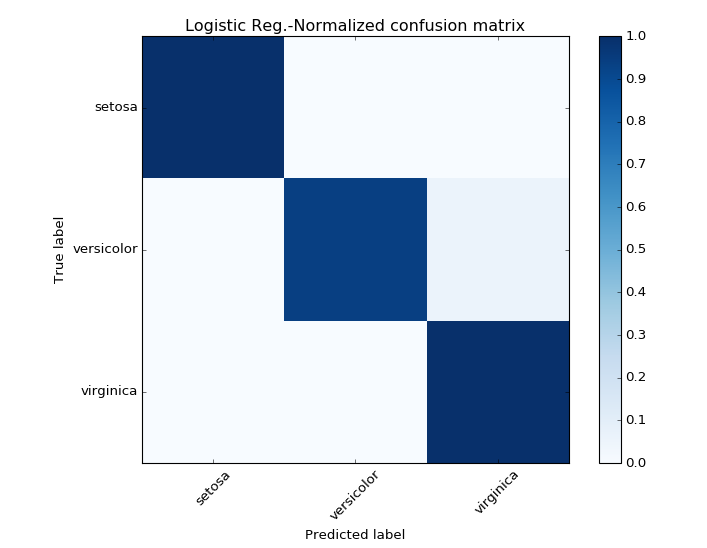

In [72]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(iris.target_names))
    plt.xticks(tick_marks, iris.target_names, rotation=45)
    plt.yticks(tick_marks, iris.target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


# Compute confusion matrix
# cm = confusion_matrix(y_test, prediction)
# np.set_printoptions(precision=2)
# print('Confusion matrix, without normalization')
# print(cm)
# plt.figure()
# plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plot_confusion_matrix(cm_normalized, title='Logistic Reg.-Normalized confusion matrix')
